Shelton Bai's Notebook
Dataset: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02

In [11]:
import pandas as pd
import numpy as np
from math import isnan
import matplotlib.pyplot as plt

In [12]:
fireData = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
neighborhoodFires = {}
print(fireData.head(5))

      call_no  incident_type        type_description  \
0  F160029985          111.0           Building fire   
1  F180022058          111.0           Building fire   
2  F180022102          131.0  Passenger vehicle fire   
3  F170043431          131.0  Passenger vehicle fire   
4  F180021111          111.0           Building fire   

                                          address           alarm_time  \
0       800 BLOCK CENTER ST, WILKINSBURG PA 15221  2016-04-21T05:01:04   
1        1100 BLOCK JANE ST, WILKINSBURG PA 15221  2018-03-13T08:34:43   
2  SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212  2018-03-13T11:54:23   
3      1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2017-05-31T08:39:47   
4      2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205  2018-03-09T10:26:42   

   alarms primary_unit  census_tract neighborhood  council_district  ward  \
0       1      231EN16           NaN          NaN               NaN   NaN   
1       1      231EN16           NaN          NaN               

In [13]:
def fireMetricAdd():
    for i in range(0, len(fireData) - 1):
        if (fireData["neighborhood"].iloc[i] in neighborhoodFires):
            neighborhoodFires[fireData["neighborhood"].iloc[i]] += 1
        else:
            neighborhoodFires[fireData["neighborhood"].iloc[i]] = 1
            
fireMetricAdd()
print(neighborhoodFires)

{nan: 891, 'Fineview': 45, 'Fairywood': 19, 'South Side Flats': 203, 'Allegheny Center': 50, 'Lincoln-Lemington-Belmar': 161, 'Carrick': 231, 'Beechview': 115, 'Allentown': 99, 'Beltzhoover': 107, 'Crafton Heights': 70, 'Homewood North': 155, 'Squirrel Hill South': 200, 'Perry North': 96, 'Bedford Dwellings': 35, 'Homewood South': 144, 'East Allegheny': 96, 'Crawford-Roberts': 84, 'Sheraden': 144, 'Middle Hill': 86, 'Strip District': 41, 'East Hills': 132, 'Garfield': 92, 'Greenfield': 84, 'North Shore': 53, 'Spring Hill-City View': 89, 'Central Business District': 208, 'Upper Hill': 37, 'Manchester': 57, 'Overbrook': 43, 'Polish Hill': 30, 'Central Lawrenceville': 63, 'Brookline': 144, 'Marshall-Shadeland': 107, 'North Oakland': 101, 'South Oakland': 73, 'Homewood West': 45, 'East Liberty': 168, 'Hazelwood': 200, 'Squirrel Hill North': 102, 'Friendship': 26, 'West Oakland': 52, 'Terrace Village': 76, 'Brighton Heights': 118, 'Troy Hill': 61, 'Windgap': 16, 'Knoxville': 131, 'Upper Law

In [14]:
neighborhoodFiresNoNan = {k: neighborhoodFires[k] for k in neighborhoodFires if type(k) is str}
print(neighborhoodFiresNoNan)


{'Fineview': 45, 'Fairywood': 19, 'South Side Flats': 203, 'Allegheny Center': 50, 'Lincoln-Lemington-Belmar': 161, 'Carrick': 231, 'Beechview': 115, 'Allentown': 99, 'Beltzhoover': 107, 'Crafton Heights': 70, 'Homewood North': 155, 'Squirrel Hill South': 200, 'Perry North': 96, 'Bedford Dwellings': 35, 'Homewood South': 144, 'East Allegheny': 96, 'Crawford-Roberts': 84, 'Sheraden': 144, 'Middle Hill': 86, 'Strip District': 41, 'East Hills': 132, 'Garfield': 92, 'Greenfield': 84, 'North Shore': 53, 'Spring Hill-City View': 89, 'Central Business District': 208, 'Upper Hill': 37, 'Manchester': 57, 'Overbrook': 43, 'Polish Hill': 30, 'Central Lawrenceville': 63, 'Brookline': 144, 'Marshall-Shadeland': 107, 'North Oakland': 101, 'South Oakland': 73, 'Homewood West': 45, 'East Liberty': 168, 'Hazelwood': 200, 'Squirrel Hill North': 102, 'Friendship': 26, 'West Oakland': 52, 'Terrace Village': 76, 'Brighton Heights': 118, 'Troy Hill': 61, 'Windgap': 16, 'Knoxville': 131, 'Upper Lawrenceville

<BarContainer object of 91 artists>

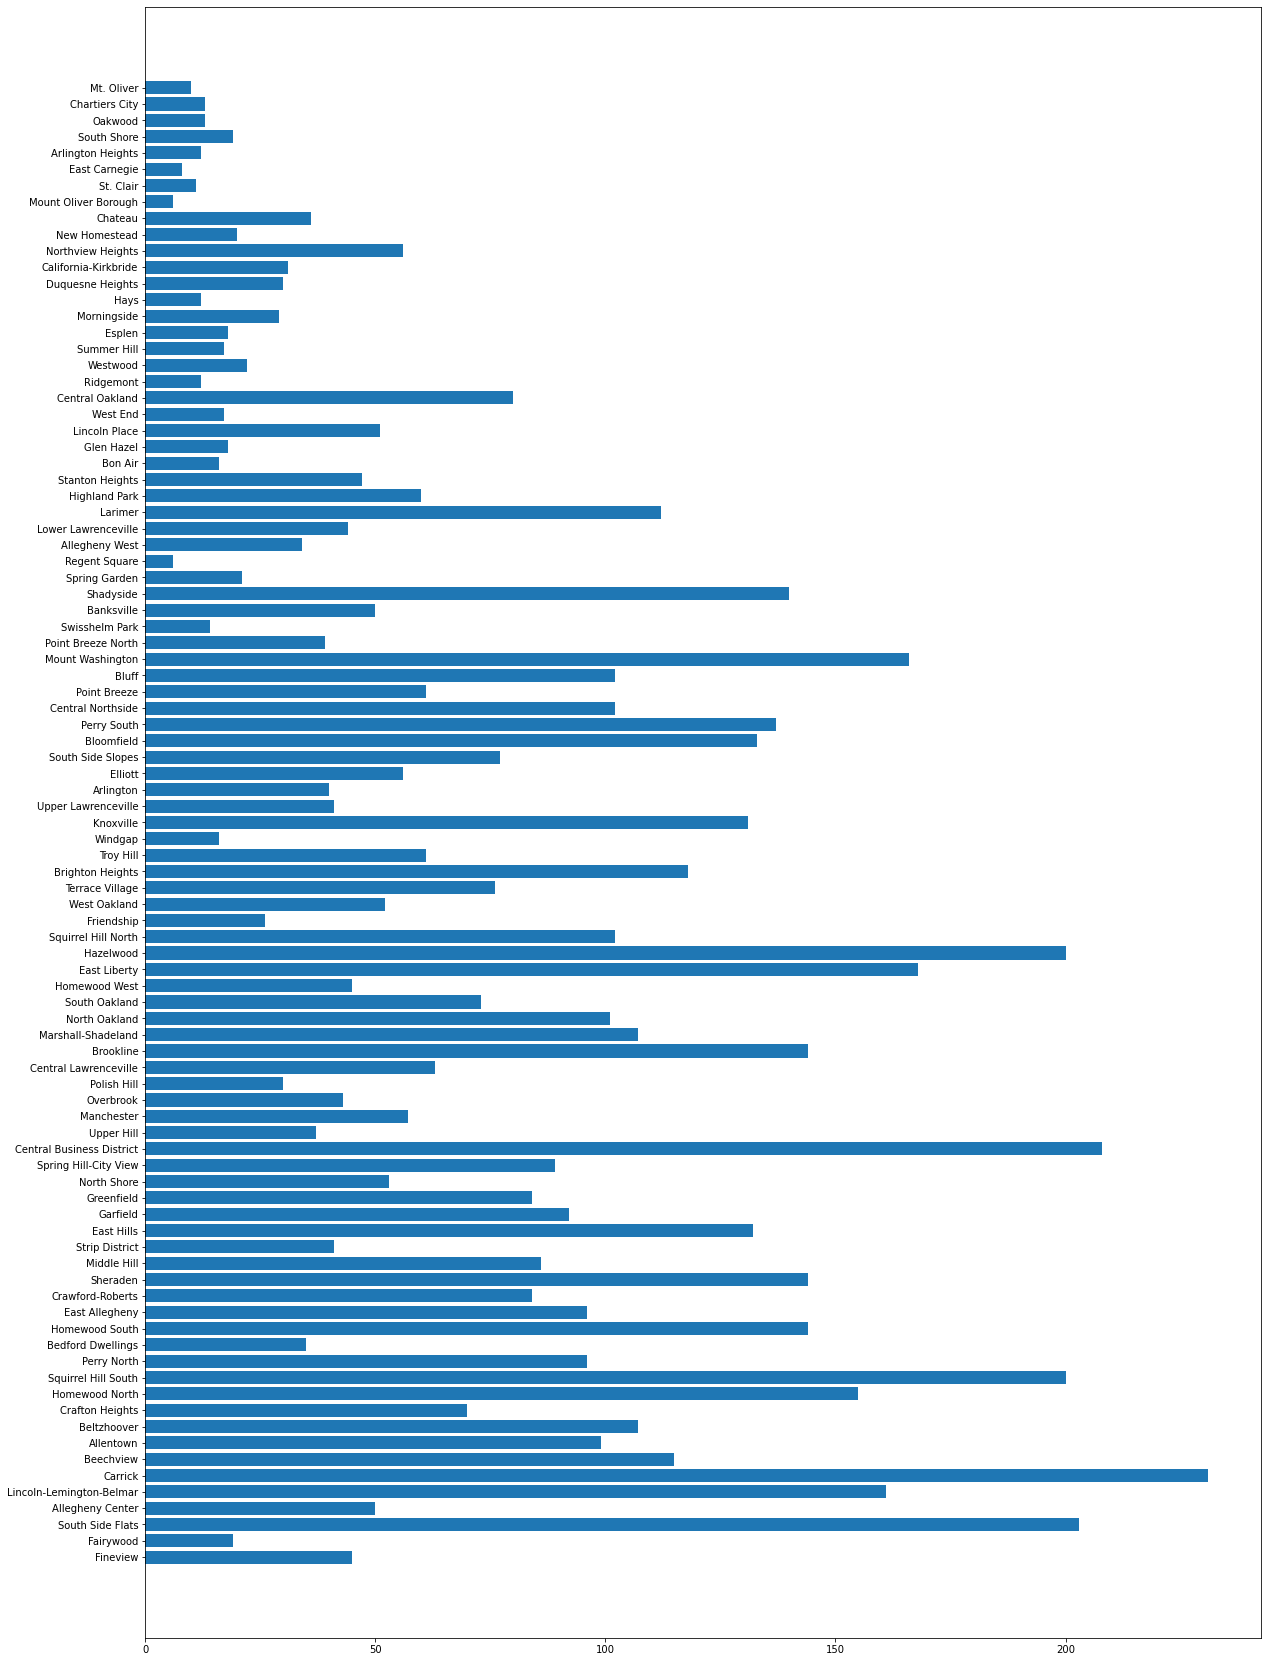

In [15]:
nhood = list(neighborhoodFiresNoNan.keys())
fireCount = list(neighborhoodFiresNoNan.values())
plt.figure(figsize=(20, 30))
plt.barh(range(len(neighborhoodFiresNoNan)),fireCount,tick_label = nhood)